# Introduction

My goal with this project is to deeply understand the dynamics of the stock market and provide insights that help investors make more informed decisions. By analyzing 20 years of historical Google stock data, I aim to uncover trends, measure volatility, and predict future price movements using advanced machine learning techniques. This analysis is designed to deliver actionable insights that enhance investment and trading strategies.

## Goal

The primary objective of my project is to predict Google’s future stock prices based on historical data. Leveraging advanced algorithms such as Long Short-Term Memory (LSTM) models, I aim to identify patterns and trends that guide investment decisions and minimize risks. By doing so, my goal is to empower investors and traders to make data-driven decisions with confidence.

### Methodology

**1. Data Source:**
 
- I worked with 20 years of Google stock data, including daily opening, closing, high, and low prices, along with trading volumes.
- The dataset was sourced from Kaggle: Google Stock Data 20 Years.

**2. Data Preparation:**

- I processed raw data by handling missing values and removing anomalies.
- The data was scaled and transformed into time-series sequences to ensure compatibility with LSTM models.


**3. Baseline Models:**

- I started with basic machine learning models like Linear Regression and Random Forest to establish initial benchmarks for performance.

**4. Advanced Modeling:**

- To capture complex temporal patterns, I implemented LSTM models and optimized them using hyperparameter tuning and callback methods such as EarlyStopping.

**5. Evaluation and Visualization:**

- I evaluated my models using metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), and R².

- I visualized predictions alongside actual stock prices to provide clear insights into model performance.

### Scope

This project helped me develop a strong understanding of stock market analysis. I believe it can be especially useful for investors and traders in the following areas:

**Identify Historical Trends**  Gaining insights into long-term and short-term market movements.

**Anticipate Volatility**  Predicting price fluctuations to minimize risks.

**Enhance Strategies:** Using data-driven insights to optimize investment and trading strategies.

The methods and analyses I developed in this project bridge the gap between technical analysis and actionable financial strategies. This allows for a robust tool to understand Google stock behavior and predict future price movements effectively.

# Data Cleaning and Preprocessing

### Imports

In [424]:
# Data processing and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns


# Machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Evaluation metrics
from sklearn.metrics import (
 mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
)

# Deep learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


In [425]:
data = pd.read_csv(r'C:\Users\Elif Surucu\Documents\Flatiron\Assesments\Project4\Google-Stock-Market-Data\data.csv')
data.head()



,Date,Open,High,Low,Close,Adj Close,Volume,Year,Volatility,Month,Volume_Category
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216,2004,0.201743,8,Very High
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,2004,0.213699,8,Very High
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939,2004,0.110336,8,Very High
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159,2004,0.200000,8,Very High
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512,2004,0.102616,8,Very High


In [427]:
data.info()
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4936 entries, 0 to 4935
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             4936 non-null   object 
 1   Open             4936 non-null   float64
 2   High             4936 non-null   float64
 3   Low              4936 non-null   float64
 4   Close            4936 non-null   float64
 5   Adj Close        4936 non-null   float64
 6   Volume           4936 non-null   int64  
 7   Year             4936 non-null   int64  
 8   Volatility       4936 non-null   float64
 9   Month            4936 non-null   int64  
 10  Volume_Category  4936 non-null   object 
dtypes: float64(6), int64(3), object(2)
memory usage: 424.3+ KB
         Date      Open      High       Low     Close  Adj Close     Volume  \
0  2004-08-19  2.490664  2.591785  2.390042  2.499133   2.499133  897427216   
1  2004-08-20  2.515820  2.716817  2.503118  2.697639   2.697639  4588574

In [428]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Ensure no duplicates
data = data.drop_duplicates()

# Recheck missing values
print("Missing values after cleaning:\n", data.isnull().sum())

Missing values after cleaning:
 Date               0
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
Year               0
Volatility         0
Month              0
Volume_Category    0
dtype: int64


In [429]:
# Extract the day of the week from the 'Date' column
data['DayOfWeek'] = data['Date'].dt.day_name()  # Converts dates to day names (e.g., Monday, Tuesday)

# Encode the 'Volume_Category' categorical feature into numerical values
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Volume_Category_Encoded'] = encoder.fit_transform(data['Volume_Category'])  # Encodes categories as integers


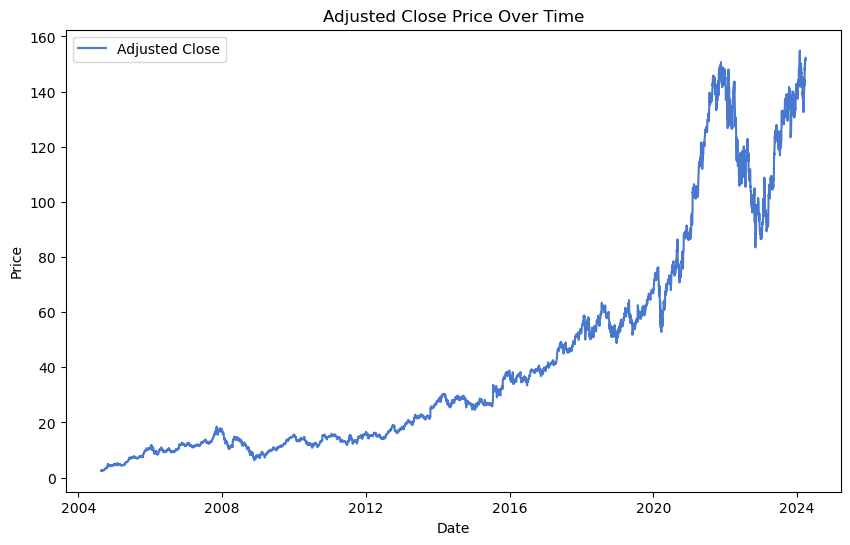

In [430]:
# Plot Adjusted Close Price over time
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Adj Close'], label='Adjusted Close')
plt.title('Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()



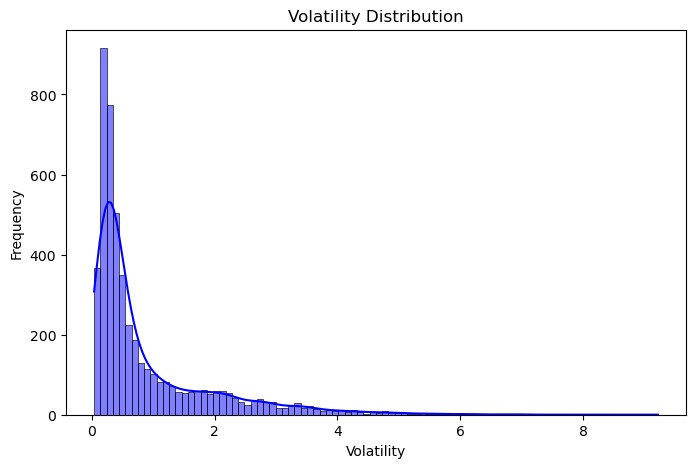

In [431]:
# Plot the distribution of volatility
plt.figure(figsize=(8, 5))
sns.histplot(data['Volatility'], kde=True, color='blue')  # KDE overlay for better insight
plt.title('Volatility Distribution')
plt.xlabel('Volatility')
plt.ylabel('Frequency')
plt.show()



# Shotgun Method

In [433]:

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

if 'DayOfWeek' in data.columns:
    data['DayOfWeek_Encoded'] = label_encoder.fit_transform(data['DayOfWeek'])
    data = data.drop(columns=['DayOfWeek'])  # Drop original column after encoding

# Ensure 'Volume_Category_Encoded' is ready
if 'Volume_Category' in data.columns and 'Volume_Category_Encoded' not in data.columns:
    data['Volume_Category_Encoded'] = label_encoder.fit_transform(data['Volume_Category'])
    data = data.drop(columns=['Volume_Category'])  # Drop original column after encoding

# Validate updated DataFrame
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4936 entries, 0 to 4935
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     4936 non-null   datetime64[ns]
 1   Open                     4936 non-null   float64       
 2   High                     4936 non-null   float64       
 3   Low                      4936 non-null   float64       
 4   Close                    4936 non-null   float64       
 5   Adj Close                4936 non-null   float64       
 6   Volume                   4936 non-null   int64         
 7   Year                     4936 non-null   int64         
 8   Volatility               4936 non-null   float64       
 9   Month                    4936 non-null   int64         
 10  Volume_Category          4936 non-null   object        
 11  Volume_Category_Encoded  4936 non-null   int32         
 12  DayOfWeek_Encoded        4936 non-

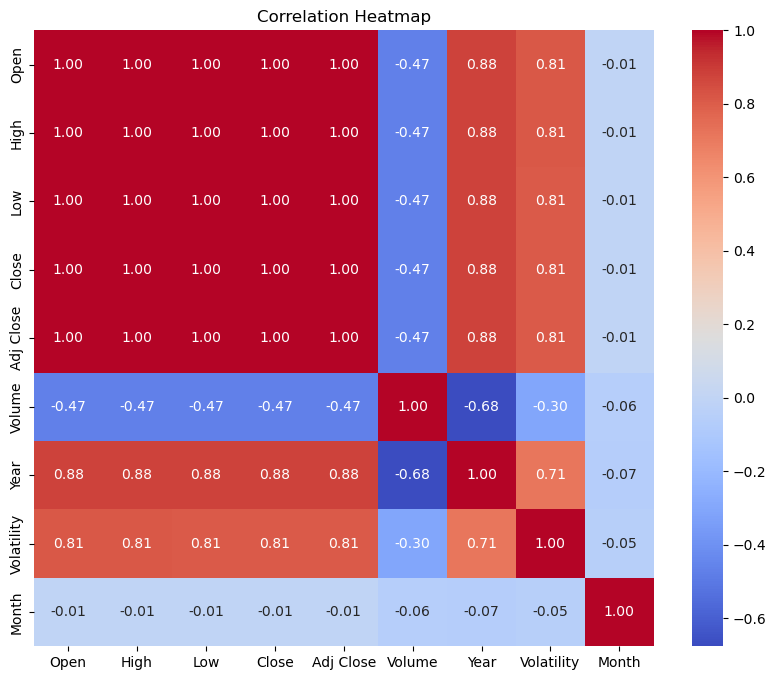

In [434]:
# Select numerical columns for correlation
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap")
plt.show()


In [437]:
X_scaled_aligned = X_scaled[:len(y)] 

X_train shape: (999, 5), X_test shape: (250, 5)

Model Performance:

Linear Regression:
MAE: 0.1220
MSE: 0.0255
RMSE: 0.1597
R2 Score: 0.4579

Random Forest:
MAE: 0.0629
MSE: 0.0072
RMSE: 0.0851
R2 Score: 0.8460

K-Nearest Neighbors:
MAE: 0.0699
MSE: 0.0081
RMSE: 0.0901
R2 Score: 0.8276


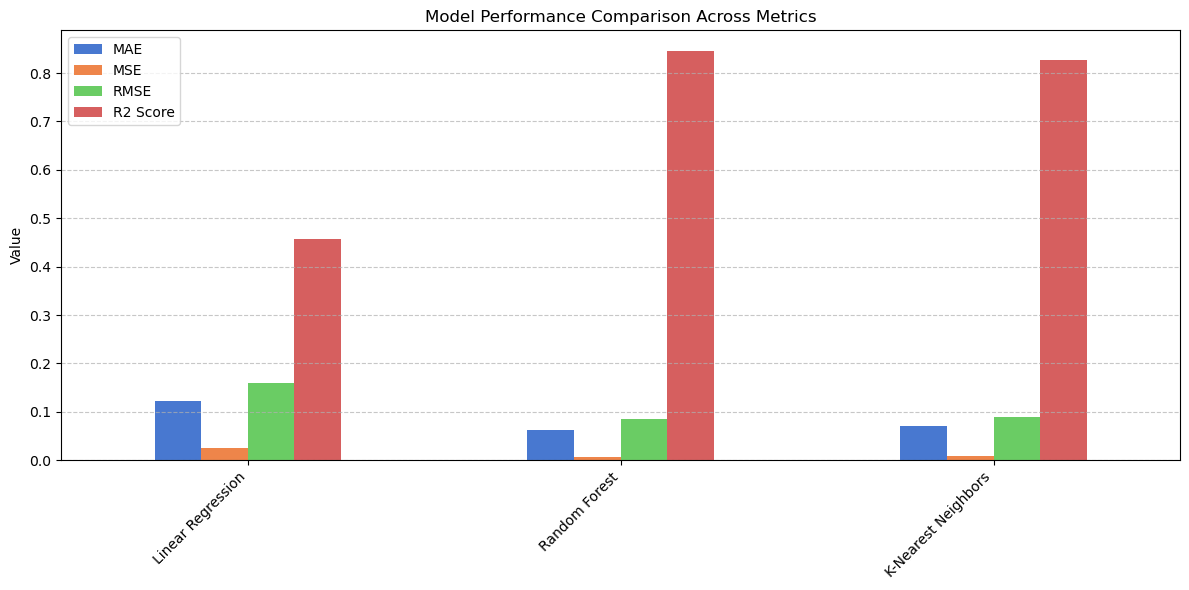

In [439]:
# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_aligned, y, test_size=0.2, random_state=42)

# Print shapes of the train and test sets
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")

# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5)
}

# Train the models and store evaluation results
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Calculate performance metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    results[model_name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2 Score": r2
    }

# Display results in a readable format
print("\nModel Performance:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

# Visualize the performance comparison
metrics_df = pd.DataFrame(results).T  # Transpose for better readability
metrics_df.plot(kind='bar', figsize=(12, 6), title="Model Performance Comparison", legend=True)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Value")
plt.title("Model Performance Comparison Across Metrics")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Model Performance:

Linear Regression:
MAE: 0.2079
MSE: 0.1404
RMSE: 0.3746
R2 Score: 0.9999

Random Forest:
MAE: 0.2694
MSE: 0.2495
RMSE: 0.4995
R2 Score: 0.9998

K-Nearest Neighbors:
MAE: 0.6484
MSE: 1.1006
RMSE: 1.0491
R2 Score: 0.9993


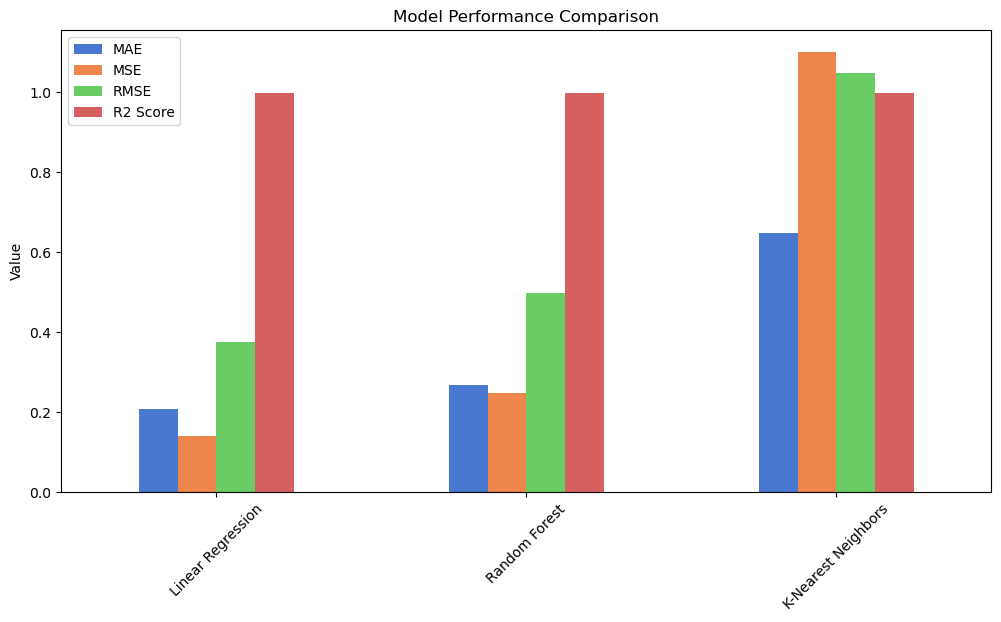

In [374]:
# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5)
}

# Train the models and store evaluation results
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Calculate performance metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    results[model_name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2 Score": r2
    }

# Results
print("Model Performance:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

# Visualize the performance comparison
metrics_df = pd.DataFrame(results).T
metrics_df.plot(kind='bar', figsize=(12, 6), title="Model Performance Comparison")
plt.xticks(rotation=45)
plt.ylabel("Value")
plt.show()


# Hyperparameter Optimization and Pipelining

In [375]:
# Best performing model: Random Forest 
# Hyperparameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

# Hyperparameter optimization with GridSearchCV
rf_model = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(
    estimator=rf_model, 
    param_grid=param_grid_rf, 
    cv=5, 
    scoring='r2', 
    verbose=2, 
    n_jobs=-1
)

# Optimize the model using the training data
grid_search_rf.fit(X_train, y_train)

# Display the best parameters and results
print(f"Best Parameters: {grid_search_rf.best_params_}")
print(f"Best R2 Score (CV): {grid_search_rf.best_score_:.4f}")

# Make predictions with the best model
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Calculate performance metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the results
print("\nRandom Forest Model Results (After Optimization):")
print(f"MAE: {mae_rf:.4f}")
print(f"MSE: {mse_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")
print(f"R2 Score: {r2_rf:.4f}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best R2 Score (CV): 0.9998

Random Forest Model Results (After Optimization):
MAE: 0.2709
MSE: 0.2514
RMSE: 0.5014
R2 Score: 0.9998


# Neural Network (Sniper Approach) - LSTM ile Modelleme

Epoch 1/50
122/122 [==============================] - 14s 98ms/step - loss: 0.0147
Epoch 2/50
122/122 [==============================] - 12s 96ms/step - loss: 0.0137
Epoch 3/50
122/122 [==============================] - 12s 96ms/step - loss: 0.0131
Epoch 4/50
122/122 [==============================] - 14s 111ms/step - loss: 0.0122
Epoch 5/50
122/122 [==============================] - 15s 120ms/step - loss: 0.0117
Epoch 6/50
122/122 [==============================] - 13s 109ms/step - loss: 0.0116
Epoch 7/50
122/122 [==============================] - 11s 93ms/step - loss: 286.4581
Epoch 8/50
122/122 [==============================] - 11s 93ms/step - loss: 0.0149
Epoch 9/50
122/122 [==============================] - 12s 95ms/step - loss: 0.0141
Epoch 10/50
122/122 [==============================] - 11s 94ms/step - loss: 0.0138
Epoch 11/50
122/122 [==============================] - 11s 93ms/step - loss: 0.0134
Epoch 12/50
122/122 [==============================] - 12s 96ms/step - loss: 0.0

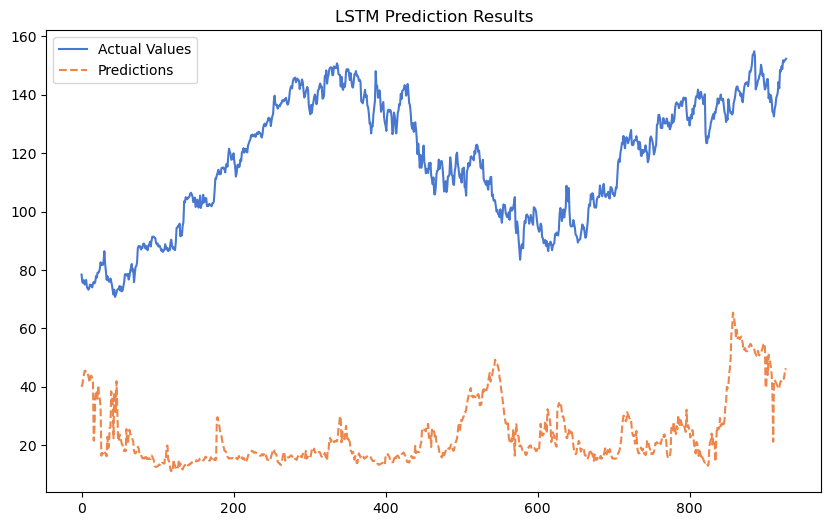

In [376]:
# Scaling the data for LSTM
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Reshaping the data for LSTM
time_steps = 60  # Use the past 60 days to make predictions
X_lstm, y_lstm = [], []

for i in range(time_steps, len(X_train)):
    X_lstm.append(X_train[i-time_steps:i])
    y_lstm.append(y_scaled[i])

X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

# Building the LSTM model
model = Sequential()
model.add(LSTM(units=100, activation='relu', return_sequences=True, input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
history = model.fit(X_lstm, y_lstm, epochs=50, batch_size=32, verbose=1)

# Preparing the test set for predictions
X_test_lstm, y_test_lstm = [], []
for i in range(time_steps, len(X_test)):
    X_test_lstm.append(X_test[i-time_steps:i])
    y_test_lstm.append(y_scaled[i + len(X_train)])

X_test_lstm = np.array(X_test_lstm)
y_test_lstm = np.array(y_test_lstm)

# Making predictions
y_pred_lstm = model.predict(X_test_lstm)

# Reverting the scaling of predictions
y_pred_lstm = scaler.inverse_transform(y_pred_lstm)
y_test_lstm = scaler.inverse_transform(y_test_lstm)

# Calculating performance metrics
mae_lstm = mean_absolute_error(y_test_lstm, y_pred_lstm)
mse_lstm = mean_squared_error(y_test_lstm, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test_lstm, y_pred_lstm)

# Displaying results
print("\nLSTM Model Results:")
print(f"MAE: {mae_lstm:.4f}")
print(f"MSE: {mse_lstm:.4f}")
print(f"RMSE: {rmse_lstm:.4f}")
print(f"R2 Score: {r2_lstm:.4f}")

# Visualizing the predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test_lstm, label="Actual Values")
plt.plot(y_pred_lstm, label="Predictions", linestyle='--')
plt.legend()
plt.title("LSTM Prediction Results")
plt.show()


In [377]:
# Rescaling the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshaping for time steps
time_steps = 60  # You can adjust this value based on your analysis
X_lstm, y_lstm = [], []

for i in range(time_steps, len(X_scaled)):
    X_lstm.append(X_scaled[i-time_steps:i])
    y_lstm.append(y_scaled[i])

X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)



In [378]:
# Building the LSTM model with tuned hyperparameters
model = Sequential()
model.add(LSTM(units=128, activation='relu', return_sequences=True, 
               input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
model.add(Dropout(0.3))  # Dropout rate to reduce overfitting
model.add(LSTM(units=64, activation='relu', return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(units=1))  # Output layer

# Optimizer with a lower learning rate
optimizer = Adam(learning_rate=0.001)  # You can adjust the learning rate if needed

# Compiling the model
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Training the model
history = model.fit(X_lstm, y_lstm, epochs=100, batch_size=32, verbose=1)



Epoch 1/100
153/153 [==============================] - 11s 56ms/step - loss: 0.0090
Epoch 2/100
153/153 [==============================] - 8s 54ms/step - loss: 0.0031
Epoch 3/100
153/153 [==============================] - 8s 54ms/step - loss: 0.0027
Epoch 4/100
153/153 [==============================] - 8s 53ms/step - loss: 0.0022
Epoch 5/100
153/153 [==============================] - 8s 53ms/step - loss: 0.0021
Epoch 6/100
153/153 [==============================] - 8s 53ms/step - loss: 0.0018
Epoch 7/100
153/153 [==============================] - 8s 55ms/step - loss: 0.0018
Epoch 8/100
153/153 [==============================] - 8s 53ms/step - loss: 0.0018
Epoch 9/100
153/153 [==============================] - 8s 54ms/step - loss: 0.0016
Epoch 10/100
153/153 [==============================] - 8s 53ms/step - loss: 0.0016
Epoch 11/100
153/153 [==============================] - 9s 56ms/step - loss: 0.0017
Epoch 12/100
153/153 [==============================] - 8s 53ms/step - loss: 0.0015


In [379]:
# Splitting the data for time series
train_size = int(len(X_scaled) * 0.8)  # Use 80% of the data for training
X_train_lstm, X_test_lstm = X_scaled[:train_size], X_scaled[train_size:]
y_train_lstm, y_test_lstm = y_scaled[:train_size], y_scaled[train_size:]



In [380]:
from datetime import datetime, timedelta
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

# Define the date range
end_date = datetime.now() - timedelta(1)  # Yesterday's date
end_date_str = end_date.strftime('%Y-%m-%d')

start_date = end_date - timedelta(1825)  # 5 years ago
start_date_str = start_date.strftime('%Y-%m-%d')

# Download stock data
stock_data = yf.download('AAPL', start=start_date_str, end=end_date_str)  # Example: Apple stock

# Use only the closing price
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data['Close'].values.reshape(-1, 1))



[*********************100%***********************]  1 of 1 completed


In [381]:
# Define time steps
time_steps = 7  # Using the past 7 days for prediction

X, y = [], []
for i in range(time_steps, len(scaled_data)):
    X.append(scaled_data[i-time_steps:i, 0])  # Create input sequences
    y.append(scaled_data[i, 0])  # Create corresponding target values

X, y = np.array(X), np.array(y)

# Split data into training and testing sets
train_size = int(len(X) * 0.8)  # Use 80% of data for training
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape data for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [382]:
# Model definition
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], 1)))  # First LSTM layer
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(LSTM(units=64))  # Second LSTM layer
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(Dense(units=1))  # Output layer

# Compile the model
optimizer = Adam(learning_rate=0.001)  # Learning rate can be adjusted
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Model summary
model.summary()

# Add early stopping
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train, 
    epochs=50, 
    batch_size=32, 
    validation_split=0.2,  # Use 20% of the training data for validation
    callbacks=[early_stopping], 
    verbose=1
)



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 7, 64)             16896     
                                                                 
 dropout_12 (Dropout)        (None, 7, 64)             0         
                                                                 
 lstm_13 (LSTM)              (None, 64)                33024     
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 49985 (195.25 KB)
Trainable params: 49985 (195.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
25/25

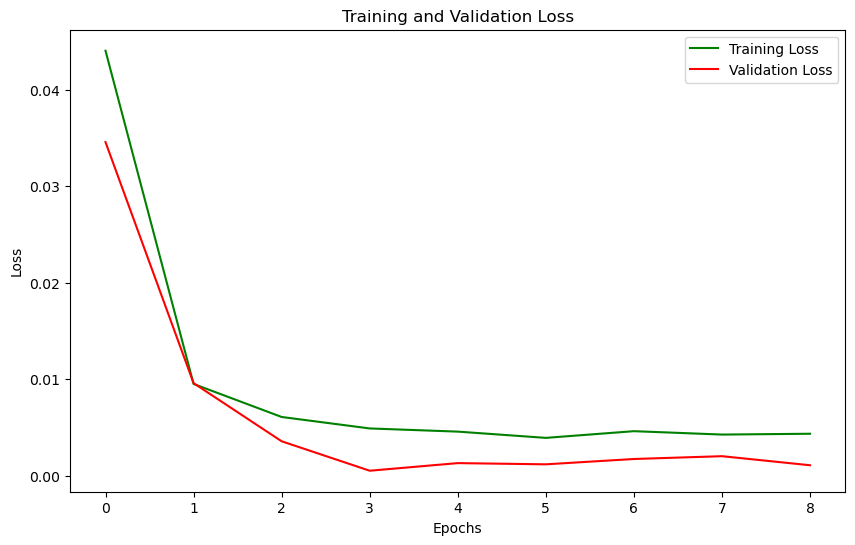

In [383]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='green')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [384]:
# Evaluate the model on test data
test_loss = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}")



8/8 [==============================] - 0s 3ms/step - loss: 8.2312e-04
Test Loss: 0.0008


8/8 [==============================] - 1s 3ms/step


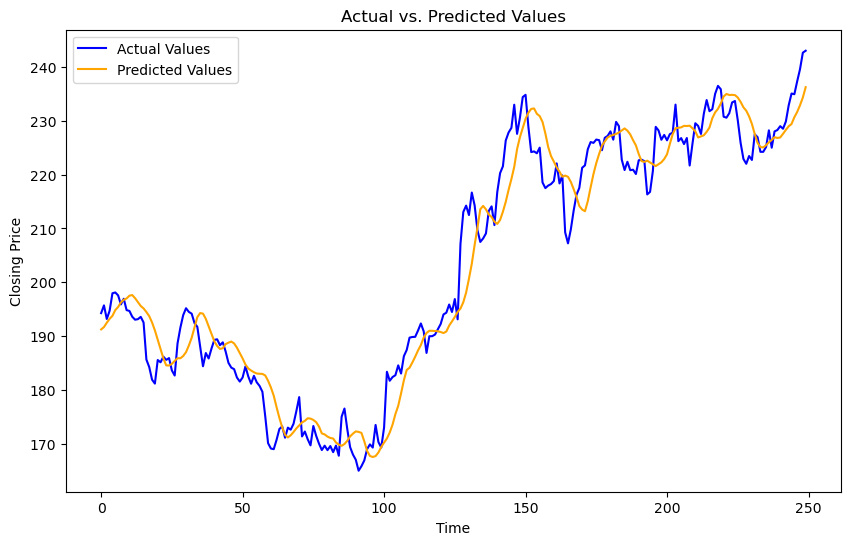

In [385]:
# Make predictions
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)  # Reverse scaling for predicted values
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reverse scaling for actual values

# Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual Values', color='blue')
plt.plot(predicted, label='Predicted Values', color='orange')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [386]:
mse = mean_squared_error(y_test_actual, predicted)
mae = mean_absolute_error(y_test_actual, predicted)
r2 = r2_score(y_test_actual, predicted)

print(f"MSE: {mse}, MAE: {mae}, R2 Score: {r2}")


MSE: 28.758311846181755, MAE: 4.229643310546876, R2 Score: 0.9436680225478741


In [387]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV


def build_model(model_learning_rate=0.001, model_lstm_units=50, model_dropout_rate=0.2):
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense, Dropout
    from tensorflow.keras.optimizers import Adam

    model = Sequential()
    model.add(LSTM(units=model_lstm_units, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(model_dropout_rate))
    model.add(LSTM(units=model_lstm_units, activation='relu'))
    model.add(Dropout(model_dropout_rate))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=model_learning_rate), loss='mean_squared_error')
    return model


model = KerasRegressor(model=build_model, verbose=0)


param_grid = {
    'model__model_learning_rate': [0.001, 0.01],
    'model__model_lstm_units': [50, 100],
    'model__model_dropout_rate': [0.2, 0.3],
    'batch_size': [16, 32],
    'epochs': [10, 20]
}


grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)


print(f"Best Parameters: {grid_result.best_params_}")
print(f"Best Score: {grid_result.best_score_}")


Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Parameters: {'batch_size': 16, 'epochs': 20, 'model__model_dropout_rate': 0.2, 'model__model_learning_rate': 0.001, 'model__model_lstm_units': 100}
Best Score: 0.8298130823105078
